Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Training Image preprocessing

In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


Validation Image Preprocessing

In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [8]:
# # To avoid overshooting the loss function, choose a smaller learning rate.
# # The default is usually 0.001, but here we have set it to 0.0001.
# learning_rate = 0.0001
#
# # However, using a small learning rate may lead to underfitting.
# # To mitigate this, we can increase the number of neurons in the network to capture more complex patterns.
# num_neurons = 128  # Example: Increase the number of neurons
#
# # Adding more convolutional layers can help the model extract additional features from the images.
# # This will help prevent the model from missing important features or becoming confused due to lack of sufficient features.
# num_conv_layers = 3  # Example: Add more convolutional layers


Building Model

In [39]:
cnn = tf.keras.models.Sequential()

Building Convolution Layer

In [40]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [41]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [42]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [43]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [44]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [45]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [46]:
cnn.add(tf.keras.layers.Flatten())

In [47]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [48]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [49]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])


In [50]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3862s 2s/step - accuracy: 0.4823 - loss: 1.8105 - val_accuracy: 0.8516 - val_loss: 0.4705
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4194s 2s/step - accuracy: 0.8621 - loss: 0.4290 - val_accuracy: 0.9162 - val_loss: 0.2604
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4080s 2s/step - accuracy: 0.9205 - loss: 0.2419 - val_accuracy: 0.9266 - val_loss: 0.2206
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3948s 2s/step - accuracy: 0.9427 - loss: 0.1745 - val_accuracy: 0.9486 - val_loss: 0.1578
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3977s 2s/step - accuracy: 0.9586 - loss: 0.1252 - val_accuracy: 0.9504 - val_loss: 0.1631
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4005s 2s/step - accuracy: 0.9682 - loss: 0.0959 - val_accuracy: 0.9331 - val_loss: 0.2272
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4013s 2s/step - accuracy: 0.9706 - loss: 0.0855 - val_accuracy: 0.9423 - val_loss: 0.2068
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4101s 2s/step - accuracy: 0.9756 -

Evaluating Model

In [52]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 947s 431ms/step - accuracy: 0.9709 - loss: 0.0888
Training accuracy: 0.9719752669334412


In [54]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 241s 437ms/step - accuracy: 0.9411 - loss: 0.1969
Validation accuracy: 0.9392215013504028


Saving Model

In [56]:
cnn.save('trained_plant_disease_model.keras')

In [58]:
#Return Dictionary of history
training_history.history

{'accuracy': [0.6648552417755127,
  0.879209041595459,
  0.9261398315429688,
  0.9469947814941406,
  0.9605661630630493,
  0.9690163135528564,
  0.9739384055137634,
  0.9772103428840637,
  0.9796998500823975,
  0.9828721880912781],
 'loss': [1.1187857389450073,
  0.37219861149787903,
  0.2241656333208084,
  0.1607622355222702,
  0.11947490274906158,
  0.09175317734479904,
  0.07690555602312088,
  0.06896299123764038,
  0.06247358396649361,
  0.05321672931313515],
 'val_accuracy': [0.8516389727592468,
  0.9161734580993652,
  0.9265877604484558,
  0.948554515838623,
  0.9504324793815613,
  0.9330753684043884,
  0.9422945380210876,
  0.9531641006469727,
  0.9647734761238098,
  0.9392215013504028],
 'val_loss': [0.4705001711845398,
  0.26035022735595703,
  0.22064444422721863,
  0.15780407190322876,
  0.16305558383464813,
  0.22717155516147614,
  0.20679466426372528,
  0.1635282039642334,
  0.11697442829608917,
  0.20716023445129395]}

In [60]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [62]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Accuracy Visualization

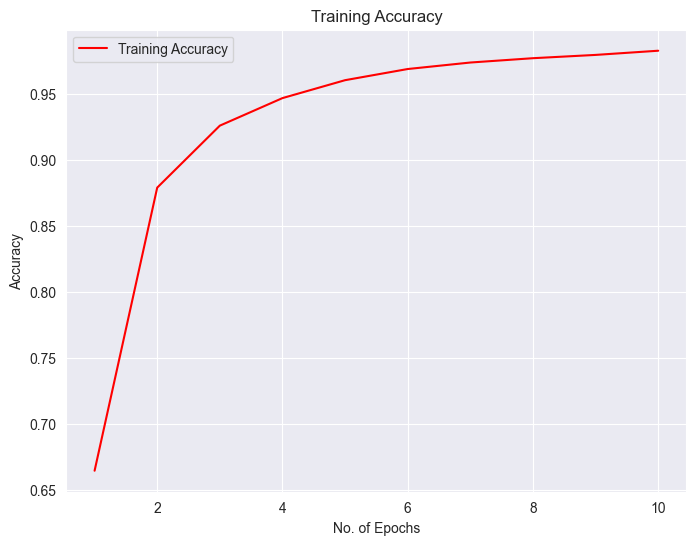

In [64]:
# Separate visualization for training accuracy
epochs = [i for i in range(1,11)]
plt.figure(figsize=(8, 6))
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.grid(True)
plt.show()

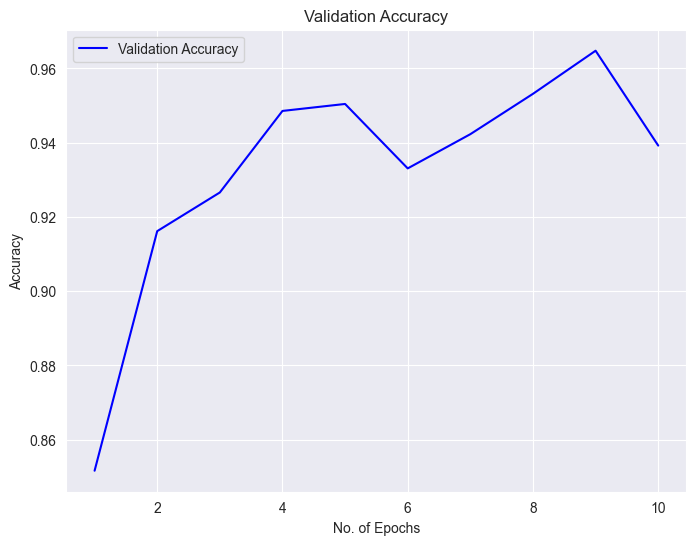

In [66]:
# Separate visualization for validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


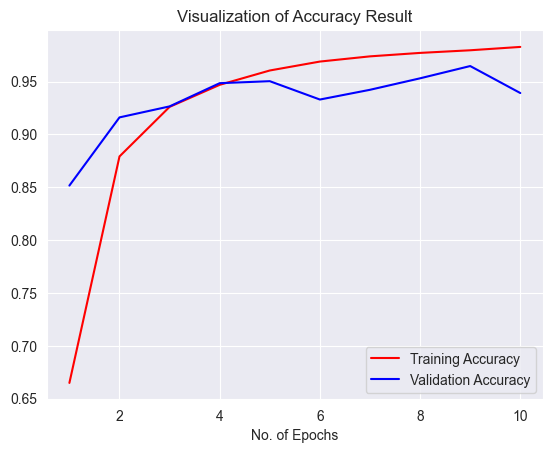

In [67]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()